# Tables for the paper

In [91]:
from pathlib import Path
from typing import List, Tuple, Dict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cluster methods

In [82]:
INITIAL_COLUMNS = ['Method', 'which_split', 'conf_thr_train', 'conf_thr_test', 'tpr_thr',
       'cluster_method', 'mean_n_clus', 'std_n_clus', 'fusion_strat',
       'U-AP_(COOD)', 'U-F1_(COOD)', 'U-PRE_(COOD)', 'U-REC_(COOD)', 'mAP',
       'U-AP_(CMIX)', 'U-F1_(CMIX)', 'U-PRE_(CMIX)', 'U-REC_(CMIX)', 'A-OSE',
       'WI-08', 'mAP_(VOC_test)', 'Model', 'args', 'custom_hyp']

FINAL_COLUMNS = ['Method', 'cluster_method',
                 'mAP_(VOC_test)',
                 'U-AP_(COOD)', 'U-F1_(COOD)', 'U-PRE_(COOD)', 'U-REC_(COOD)', 
                 'mAP', 'U-AP_(CMIX)', 'U-F1_(CMIX)', 'U-PRE_(CMIX)', 'U-REC_(CMIX)','A-OSE', 'WI-08']

COLUMNS_FOR_LATEX = ['Distance', 'Cluster Method',
                     'mAP',
                     'U-AP', 'U-F1', 'U-PRE', 'U-REC',
                     'mAP', 'U-AP', 'U-F1', 'U-PRE', 'U-REC', 'A-OSE', 'WI']

LATEX_PARAMS = {
    'index': False,
    'float_format': '%.3f',
    'bold_rows': True,
    'header': COLUMNS_FOR_LATEX,
}

NEW_NAMES_FOR_METHODS = {
    'L1_cl_stride': 'L1',
    'L2_cl_stride': 'L2',
    'Cosine_cl_stride': 'Cosine'}

CLUSTER_METHODS_TO_KEEP = ['one', 'all', 'KMeans', 'KMeans_10', 'HDBSCAN', 'AgglomerativeClustering']
NEW_NAMES_FOR_CLUSTER_METHODS = {
    'one': '$One$',
    'all': '$All$',
    'DBSCAN': '$DBSCAN$',
    'KMeans': '$KMeans$',
    'KMeans_10': '$KMeans^{10}$',
    'HDBSCAN': '$HDBSCAN$',
    'AgglomerativeClustering': '$Agglomerative$',
}

NORMAL_TEX_PATH = Path("results/cluster_methods_results/normal_df_final.tex")
IV_TEX_PATH = Path("results/cluster_methods_results/iv_df_final.tex")

In [88]:
def convert_list_of_paths_into_df(paths: list[Path]):
    # Read the documents and concat into one big dataframe
    for doc in paths:
        df = pd.read_csv(doc)
        if doc == paths[0]:
            df_final = df
        else:
            df_final = pd.concat([df_final, df])    
    return df_final

def format_df(df):
    # CONTENT CHANGES
    # Retain only the desired columns
    df_final = df[FINAL_COLUMNS]
    # Display only 3 decimals
    df_final = df_final.round(3)
    # Convert A-OSE to int
    df_final['A-OSE'] = df_final['A-OSE'].astype(int)
    # Keep only certain rows
    df_final = df_final[df_final['cluster_method'].isin(CLUSTER_METHODS_TO_KEEP)]

    # NAME CHANGES
    # Change the Method names to L1, L2, Cosine
    df_final['Method'] = df_final['Method'].replace(NEW_NAMES_FOR_METHODS)
    # Change the cluster method names
    df_final['cluster_method'] = df_final['cluster_method'].replace(NEW_NAMES_FOR_CLUSTER_METHODS)
    return df_final


def obtain_best_values_of_columns(df, columns_to_search_max, columns_to_search_min):
    # Extract values to dicts of max and min values per
    max_values = {}
    min_values = {}
    for col in columns_to_search_max:
        df[col] = df.groupby(['Method'])[col].transform('max')
        max_values[col] = df[col].max().round(3)
    for col in columns_to_search_min:
        df[col] = df.groupby(['Method'])[col].transform('min')
        min_values[col] = df[col].min().round(3)
    return max_values, min_values  


### Divide documents into normal and ivis

In [4]:
documents_to_consider = Path("results/cluster_methods_results").rglob("*.csv")
documents_to_consider = list(documents_to_consider)
documents_to_consider

[PosixPath('results/cluster_methods_results/20240624_161311_cluster_methods_L1_cl_stride_silhouette_conf_train0.15_conf_test0.15.csv'),
 PosixPath('results/cluster_methods_results/20240625_234308_cluster_methods_L2Ivis_silhouette_conf_train0.15_conf_test0.15.csv'),
 PosixPath('results/cluster_methods_results/20240626_110430_cluster_methods_CosineIvis_silhouette_conf_train0.15_conf_test0.15.csv'),
 PosixPath('results/cluster_methods_results/20240625_150107_cluster_methods_L1Ivis_silhouette_conf_train0.15_conf_test0.15.csv'),
 PosixPath('results/cluster_methods_results/20240624_105143_cluster_methods_Cosine_cl_stride_silhouette_conf_train0.15_conf_test0.15.csv'),
 PosixPath('results/cluster_methods_results/20240624_123436_cluster_methods_L2_cl_stride_silhouette_conf_train0.15_conf_test0.15.csv')]

In [7]:
normal_documents = [documents_to_consider[0], documents_to_consider[5], documents_to_consider[4]]
normal_documents

[PosixPath('results/cluster_methods_results/20240624_161311_cluster_methods_L1_cl_stride_silhouette_conf_train0.15_conf_test0.15.csv'),
 PosixPath('results/cluster_methods_results/20240624_123436_cluster_methods_L2_cl_stride_silhouette_conf_train0.15_conf_test0.15.csv'),
 PosixPath('results/cluster_methods_results/20240624_105143_cluster_methods_Cosine_cl_stride_silhouette_conf_train0.15_conf_test0.15.csv')]

In [9]:
ivis_documents = [documents_to_consider[3], documents_to_consider[1], documents_to_consider[2]]
ivis_documents

[PosixPath('results/cluster_methods_results/20240625_150107_cluster_methods_L1Ivis_silhouette_conf_train0.15_conf_test0.15.csv'),
 PosixPath('results/cluster_methods_results/20240625_234308_cluster_methods_L2Ivis_silhouette_conf_train0.15_conf_test0.15.csv'),
 PosixPath('results/cluster_methods_results/20240626_110430_cluster_methods_CosineIvis_silhouette_conf_train0.15_conf_test0.15.csv')]

### Normal

In [83]:
normal_df = convert_list_of_paths_into_df(normal_documents)
normal_df.reset_index(drop=True, inplace=True)
normal_df_final = format_df(normal_df)
latex_str = normal_df_final.to_latex(**LATEX_PARAMS)
normal_df_final.to_latex(NORMAL_TEX_PATH, **LATEX_PARAMS)
normal_df_final.tail()

,Method,cluster_method,mAP_(VOC_test),U-AP_(COOD),U-F1_(COOD),U-PRE_(COOD),U-REC_(COOD),mAP,U-AP_(CMIX),U-F1_(CMIX),U-PRE_(CMIX),U-REC_(CMIX),A-OSE,WI-08
21,Cosine,$All$,0.591,0.160,0.206,0.686,0.121,0.376,0.020,0.113,0.220,0.076,211,0.125
23,Cosine,$KMeans$,0.623,0.158,0.199,0.694,0.116,0.406,0.022,0.097,0.239,0.061,247,0.126
26,Cosine,$KMeans^{10}$,0.583,0.163,0.235,0.699,0.141,0.380,0.022,0.124,0.241,0.083,193,0.107
27,Cosine,$HDBSCAN$,0.631,0.159,0.212,0.692,0.125,0.415,0.025,0.111,0.270,0.070,224,0.119
28,Cosine,$Agglomerative$,0.647,0.160,0.187,0.718,0.107,0.416,0.022,0.093,0.240,0.058,254,0.128


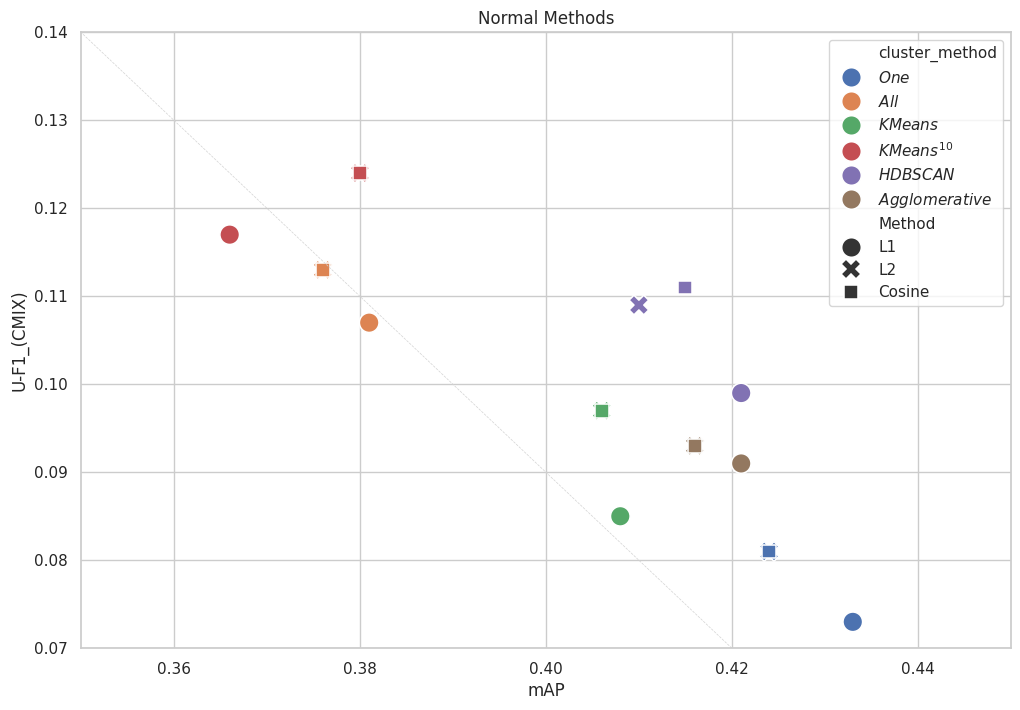

In [120]:

# Convert the dataframe to a figure where the axes are the mAP and the U-F1
# Each method should be one type of point
# Each cluster method one color

# Create the figure

#sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=normal_df_final, x='mAP', y='U-F1_(CMIX)', hue='cluster_method', style='Method',
                # Define marker size
                s=200,
                #size='A-OSE', sizes=(100, 200), 
                ax=ax)
# Set the axis mAP=[0.35, 0.45] and U-F1=[0.7, 0.14]
ax.set_xlim(0.35, 0.45)
ax.set_ylim(0.07, 0.14)
# Instead of vertical and horizontal lines for the grid, use -45 degrees angled lines
# Define the limits of the plot
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

# Create angled grid lines
for x in np.arange(xlim[0], xlim[1], 5):
    plt.plot([xlim[0], xlim[1]], [ylim[0] + x, ylim[0] + x - (xlim[1] - xlim[0])], color='lightgrey', linestyle='--', linewidth=0.5)

for y in np.arange(ylim[0], ylim[1], 5):
    plt.plot([xlim[0] + y, xlim[0] + y - (ylim[1] - ylim[0])], [ylim[0], ylim[1]], color='lightgrey', linestyle='--', linewidth=0.5)
plt.title("Normal Methods")
plt.show()


In [102]:
def format_latex_str(latex_str: str, mark_greater_values: Dict[str, float], mark_lower_values: Dict[str, float]) -> str:
    # Split the string into lines
    lines = latex_str.splitlines()
    # Add the midrules
    lines.insert(10, '\\midrule')
    lines.insert(17, '\\midrule')
    lines.insert(24, '\\midrule')
    # Join the lines back into a single string    
    final_latex_str = '\n'.join(lines)
    # Mark in bold and underline the greatest value of each column
    for col, value in mark_greater_values.items():
        # For each value, search for it in the string and change it to bold
        final_latex_str = final_latex_str.replace(str(value), '\\underline{\\textbf{' + str(value) + '}}')
    for col, value in mark_lower_values.items():
        # For each value, search for it in the string and change it to bold
        final_latex_str = final_latex_str.replace(str(value), '\\textbf{' + str(value) + '}')
    return final_latex_str

In [103]:
max_values, min_values = obtain_best_values_of_columns(normal_df, columns_to_search_max=FINAL_COLUMNS[2:-2], columns_to_search_min=FINAL_COLUMNS[-2:])
final_latex_str = format_latex_str(latex_str, max_values, min_values)
# Save the final string to the file
with open(NORMAL_TEX_PATH, 'w') as f:
    f.write(final_latex_str)

### Ivis

In [59]:
ivis_df = convert_list_of_paths_into_df(ivis_documents)
ivis_df.reset_index(drop=True, inplace=True)
ivis_df_final = format_df(ivis_df)
ivis_df_final.to_latex(IV_TEX_PATH, **LATEX_PARAMS)
ivis_df_final.tail()

,Method,cluster_method,mAP_(VOC_test),U-AP_(COOD),U-F1_(COOD),U-PRE_(COOD),U-REC_(COOD),mAP,U-AP_(CMIX),U-F1_(CMIX),U-PRE_(CMIX),U-REC_(CMIX),A-OSE,WI-08
25,CosineIvis,KMeans_5,0.536,0.240,0.333,0.706,0.218,0.363,0.052,0.151,0.281,0.103,134,0.082
26,CosineIvis,KMeans_10,0.536,0.242,0.339,0.708,0.223,0.369,0.052,0.154,0.281,0.106,126,0.080
27,CosineIvis,HDBSCAN,0.543,0.241,0.333,0.717,0.217,0.381,0.026,0.147,0.278,0.100,142,0.088
28,CosineIvis,AgglomerativeClustering,0.545,0.241,0.331,0.713,0.215,0.377,0.051,0.150,0.279,0.103,135,0.081
29,CosineIvis,Birch,0.543,0.237,0.320,0.708,0.206,0.377,0.052,0.149,0.285,0.101,139,0.083
